In [3]:
import ehtplot.color

In [1]:
!ls remote

dump_00002000_segA_2.npy  dump_00005712_segA_5.npy  dump_00010352_segA_5.npy
dump_00002000_segA_5.npy  dump_00006640_segA_5.npy  dump_00011280_segA_5.npy
dump_00002928_segA_5.npy  dump_00007568_segA_5.npy  makefile
dump_00003856_segA_5.npy  dump_00008496_segA_5.npy
dump_00004784_segA_5.npy  dump_00009424_segA_5.npy


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import os

In [121]:
fnames = sorted([f for f in os.listdir('remote/') if f.endswith('.npy')])

imdata = None
wsize = None
hsize = None

pfnames = [fnames[0], fnames[4], fnames[9]]
pfnames = [fnames[3], fnames[8], fnames[10]]
#pfnames = [fnames[3], fnames[10]]

weights = [1., 1., 1.]
# 0 ?
# 3
# 4
# 8 ?
# 10

for ifn, fname in enumerate(pfnames):
    print(f' - loading {fname}')
    data = np.load('remote/' + fname, allow_pickle=True).item()
    if imdata is None:
        imdata = data['data'] * weights[ifn]
        wsize = data['wsize']
        hsize = data['hsize']
    else:
        imdata += data['data'] * weights[ifn]

 - loading dump_00004784_segA_5.npy
 - loading dump_00009424_segA_5.npy
 - loading dump_00011280_segA_5.npy


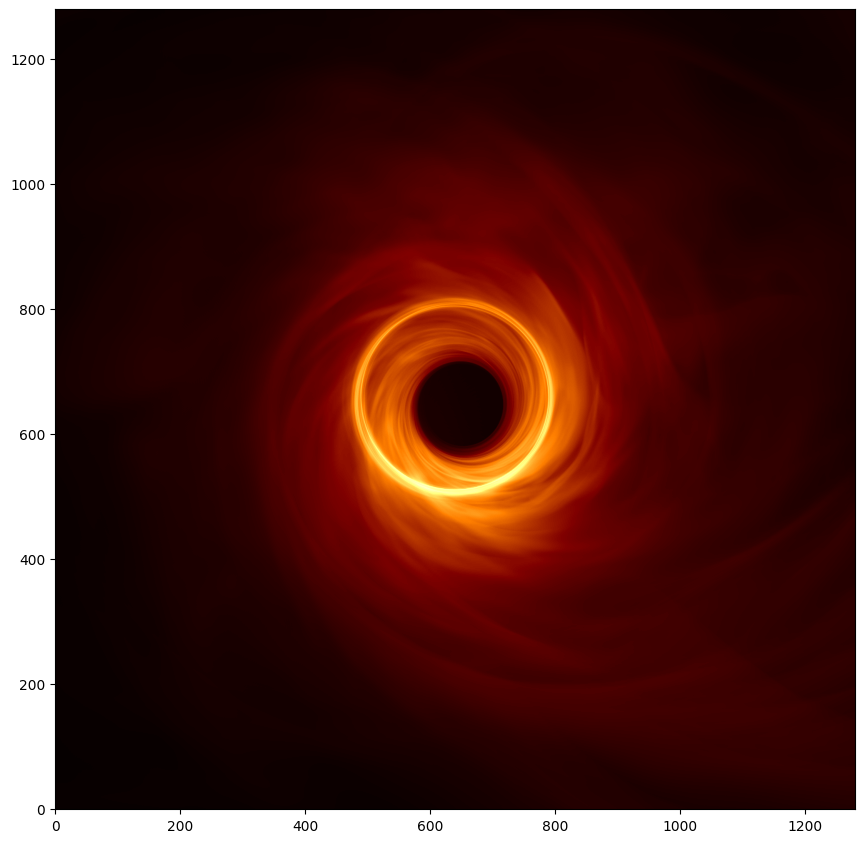

In [124]:
fig = plt.figure(figsize=(8, 8), facecolor='w')

ax1 = plt.subplot(1, 1, 1)

pdata = np.power(imdata, 0.5) * 4.
pdata += np.power(imdata, 0.32) * 10.
pdata += np.power(imdata, 3) * 20
vmax = np.max(pdata) * np.sqrt(1.2)

ax1.imshow(pdata[:, ::-1], origin='lower', cmap='afmhot', vmin=0, vmax=vmax)
ax1.set_position([0, 0, 1, 1])